# MTH5 observations during May 10-13 2024 geomagnetic storm

Overview of Sym-H index, obtained by PySPEDAS 

29-Jul-24 14:54:36: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_5min/2024/
29-Jul-24 14:54:36: File is current: c:\work\Data\SPEDAS\omni\hro2_5min/2024/omni_hro2_5min_20240501_v01.cdf
29-Jul-24 14:54:36: Time clip was applied to: SYM_H


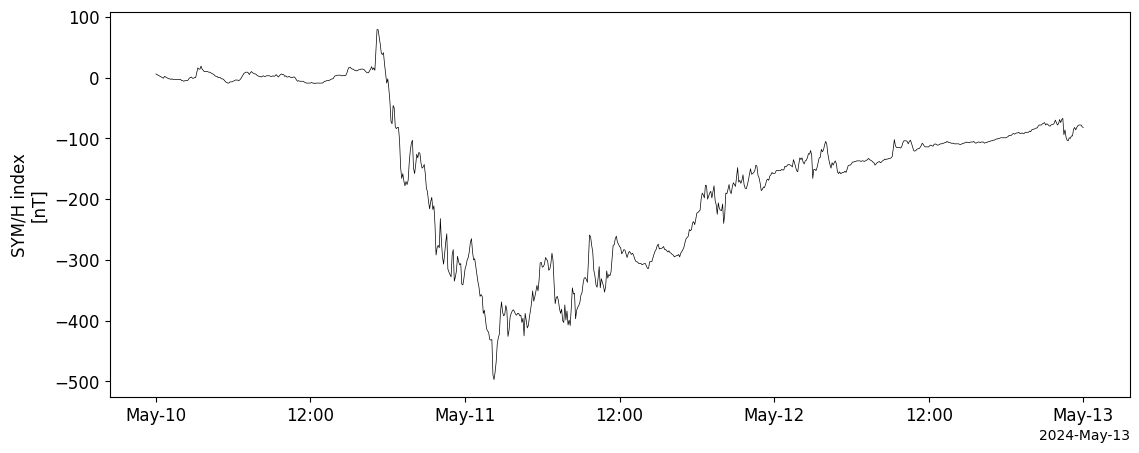

In [16]:
import pyspedas
import pytplot
pyspedas.omni.data(trange=['2024-05-10', '2024-05-13'], datatype="5min", varnames="SYM_H")
pytplot.tnames()
pytplot.tplot('SYM_H')

Several stations from __[**ZU** Network](https://ds.iris.edu/mda/ZU/?starttime=2024-05-10&endtime=2024-05-13)__ (USMTArray South Magnetotelluric Time Series) were available (__[Map](https://ds.iris.edu/gmap/#network=ZU&station=*&location=--&channel=?FE,?FN,?FZ&starttime=2024-05-10&endtime=2024-05-13&planet=earth)__). 

In [4]:
from pyspedas.mth5.load_fdsn import load_fdsn

date_start = '2024-05-10'
date_end = '2024-05-13'
stations = ['REV39', 'TXE33', 'TTE34', 'LAE43', 'ALD48'] # Station 'ORH03' is not available at this moment.
fdsn_vars = []
for sta in stations:
   load_fdsn(network="ZU", station=sta, trange=[date_start, date_end], 
             nodownload=True, noexception=True, nowarnings=True)   
   fdsn_vars.append(f"fdsn_ZU_{sta}")  # Combine names of the tplot variables

2024-07-11T19:53:23.637582-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\ZU_REV39_20240510_20240513.h5
2024-07-11T19:53:25.448429-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\ZU_TXE33_20240510_20240513.h5
2024-07-11T19:53:27.376656-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\ZU_TTE34_20240510_20240513.h5
2024-07-11T19:53:29.367818-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\ZU_LAE43_20240510_20240513.h5
2024-07-11T19:53:32.339753-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\ZU_ALD48_20240510_20240513.h5


REV39 is the northernmost station; it registered the most prominent 'z' component variation.

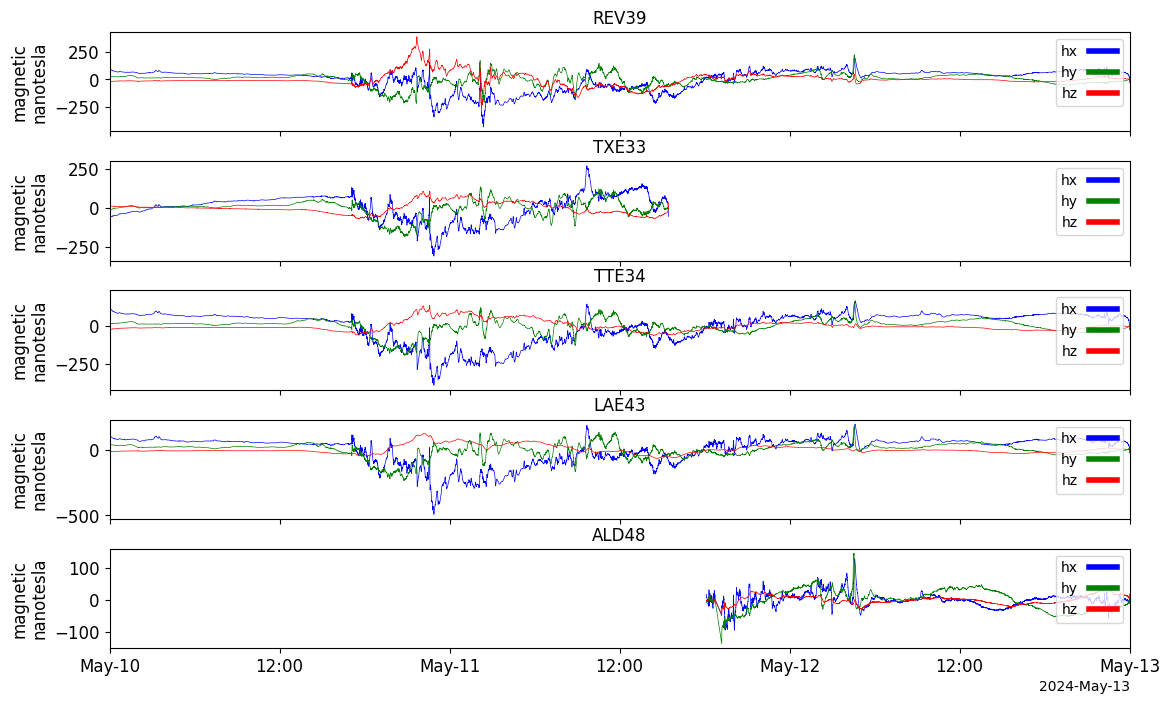

In [6]:
for sta in stations:   
   pytplot.options(f"fdsn_ZU_{sta}", 'name', sta)
   
pytplot.tplot_options('vertical_spacing', 0.3)
pytplot.xlim(date_start, date_end)
pytplot.tplot(fdsn_vars)